Mariana Gómez Cuartas

CC.1001011072

# Parcial 3: 
### Curso: Metodos computacionales 
### Profesor: Hernán David Salinas Jiménez


La entrega del examen se debe realizar a traves del git-hub en el directorio de cada estudiante.


# Ecuaciones diferenciales


## Body Planet Orbits
1. (33%) Newton’s explanation of the motion of the planets in terms of a universal law of gravitation is one of the great achievements of science. He was able to prove that the planets traveled along elliptical paths with the sun at one vertex and to predict periods of the motion accurately. All Newton needed to postulate was that the force between a planet of mass $m$ and the sun of mass $M$ is

\begin{equation}
F^{(g)} = -\frac{GmM}{r^2}
\end{equation}

Here $r$ is the planet-CM distance, $G$ is the universal gravitational constant, and the attractive force lies along the line connecting the planet and the sun. The hard part for Newton was solving the resulting differential equations because he had to invent calculus to do it and then had go through numerous analytic manipulations. The numerical solution is straightforward since even for planets the equation of motion is still

\begin{equation}
\vec{f}=m\vec{a} = m \frac{\mathrm{d}^2\vec{r}}{\mathrm{d}t^2}
\end{equation}

with the force having components:

\begin{equation}
f_x  = F^{(g)}\cos \theta =  F^{(g)}\frac{x}{r}
\end{equation}


\begin{equation}
f_y  = F^{(g)}\sin \theta =  F^{(g)}\frac{y}{r}
\end{equation}

where 

\begin{equation}
r=\sqrt{x^2+y^2}
\end{equation}



The equation of motion yields two simultaneous second-order ODEs:

\begin{equation}
\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=-GM \frac{x}{r^3}
\end{equation}

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2}=-GM \frac{y}{r^3}
\end{equation}


a. Solve the diferential equation with the next parameter:

Assume units such that GM = 1 and use the initial conditions x(0) = 0.5, y(0) = 0, vx(0) = 0.0, vy(0) = 1.63.

b. Realice a graph kind subplot with 1 row and 2 columns: in the first subplot include the graph: x vs t, y vs t and the second graph y vs x,  what is the conclusion of this results?.



In [20]:
#@title librerías

import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import integrate

The equation of motion yields two simultaneous second-order ODEs:

\begin{equation}
\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=-GM \frac{x}{r^3}
\end{equation}

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2}=-GM \frac{y}{r^3}
\end{equation}


a. Solve the diferential equation with the next parameter:

Assume units such that GM = 1 and use the initial conditions x(0) = 0.5, y(0) = 0, vx(0) = 0.0, vy(0) = 1.63.


In [3]:
#comenzamos por definir la función que contiene las ecuaciones desacopladas, para luego proceder con el uso de odeint

def fun(vals, t):

  '''
  Ingrese las condiciones iniciales
  x,y, vx,vy y el tiempo      (en este mismo orden)

  '''

  #condiciones iniciales
  x, vx, y, vy = vals

  #definimos quien es r
  r = np.sqrt(x**2 + y**2)

  #escribimos las ecuaciones
  dxdt = vx

  dvxdt = - x / (r**3)

  dydt = vy

  dvydt = -y / (r**3)

  return np.array((dxdt,dvxdt,dydt,dvydt))

In [7]:
#ahora, procedemos con la escritura de las condiciones iniciales

x0 = 0.5
vx0 = 0
y0 = 0
vy0 = 1.63

vals = np.array([x0, vx0, y0, vy0])   

#definimos un intervalo de tiempo para el cálculo de la soluión de la ecuación
time = 10
Nt = 100 
t = np.linspace(0, time, Nt)

In [10]:
#veamos ahora como es la solución
sol = odeint(fun, vals, t)

np.shape(sol)

(100, 4)

b. Realice a graph kind subplot with 1 row and 2 columns: in the first subplot include the graph: x vs t, y vs t and the second graph y vs x,  what is the conclusion of this results?.

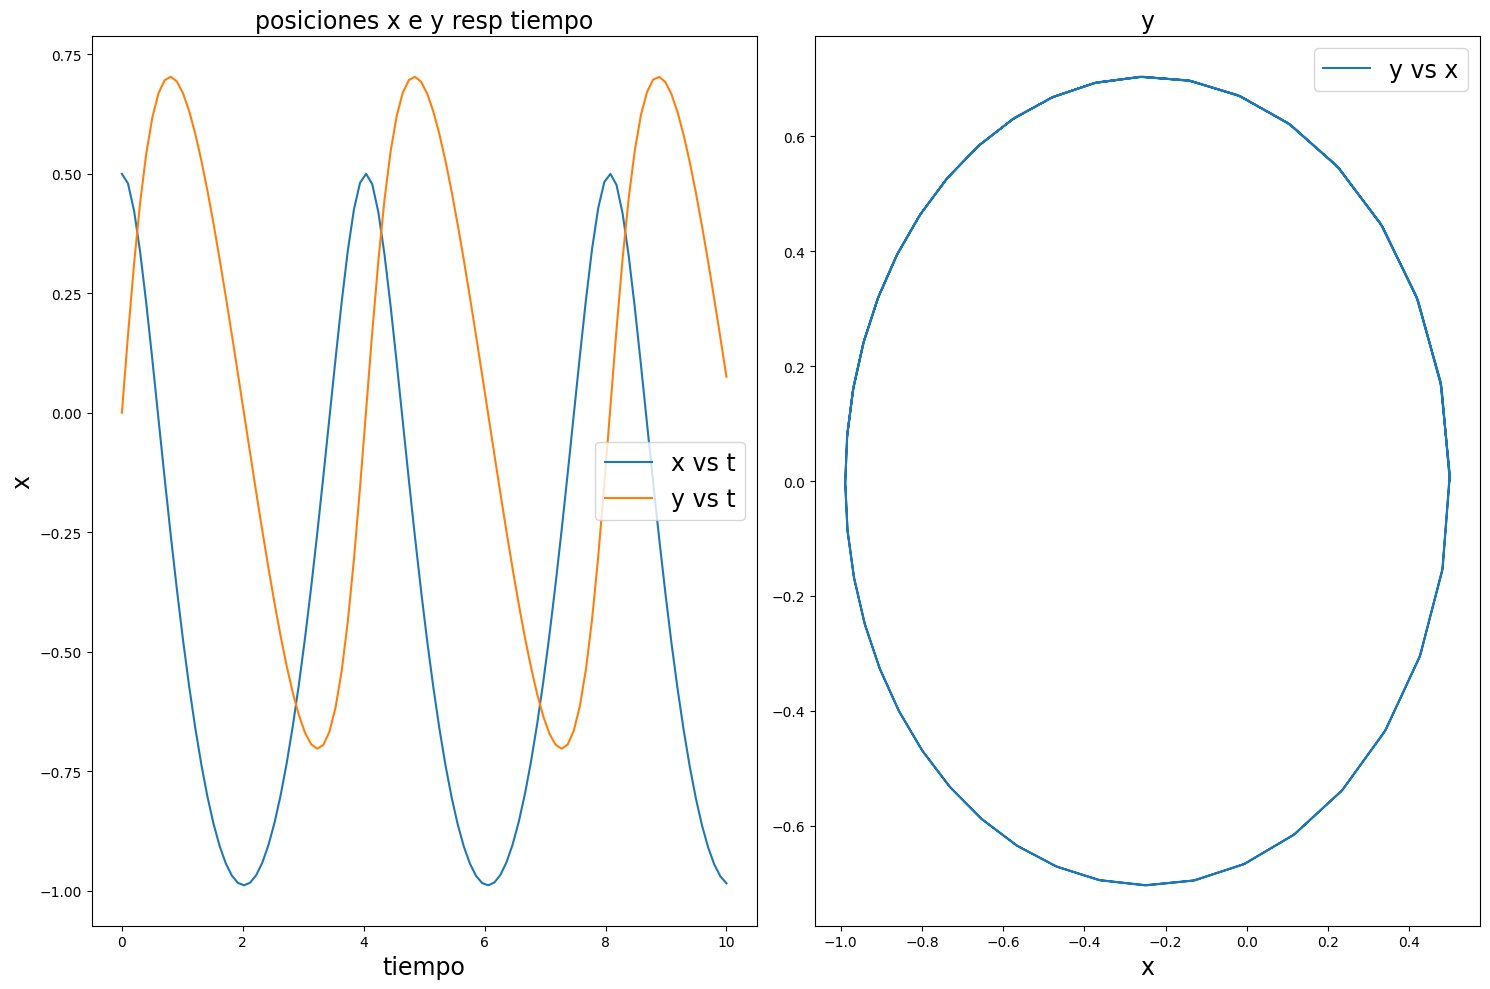

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15,10))

axs[0].plot(t, sol[:,0], label='x vs t')
axs[0].plot(t, sol[:,2], label='y vs t')
axs[1].plot(sol[:,0], sol[:,2], label='y vs x')

axs[0].set_title('posiciones x e y resp tiempo', fontsize =17)
axs[1].set_title(' y vs x', fontsize =17)

axs[0].set_xlabel('tiempo', fontsize =17)
axs[1].set_xlabel('x', fontsize =17)

axs[0].set_ylabel('x', fontsize =17)
axs[1].set_title('y', fontsize =17)

axs[0].legend(loc='best', fontsize=17)
axs[1].legend(loc='best', fontsize=17)

fig.tight_layout()

- De la gráfica de  y vs. x se puede observar que se tiene el resultado que se espera, pues es posible identificar que el trayecto que recorre el cuerpo es el de una elispe, para la cual se espera que el sol esté en uno de sus focos

- de la primera gráfica se identifican unas oscilaciones peródicas y de amplitud constante, lo cual significa que el cuerpo realiza cierto camino mientras completa su periodo, y luego de completado vuelve a la misma posición incial a realizar nuevamente el mismo recorrido


### Integracion 
2. (33%) Las [integrales elipticas](https://es.wikipedia.org/wiki/Integral_el%C3%ADptica#:~:text=Una%20integral%20el%C3%ADptica%20de%20primera,segundas%20dependen%20de%20dos%20variables) son integrales que permite dar solución a múltiples problemas en física y matemáticas. Algunos ejemplos de su uso, pueden ser encontrados en las siguientes referencias [[1]](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html)
[[2]](http://www.sc.ehu.es/sbweb/fisica_/numerico/integral/eliptica_ejemplos.html). El siguiente problema esta relacionado con al integración eliptica.


La [longitud de arco](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html) de  una elipse puede ser calculada a través de la siguiente integral.

\begin{equation}
L(k) = 4a\int_0^{\pi/2}  \mathrm{d} \phi \sqrt{1-k^2\sin^2 \phi}
\end{equation}

donde $ k^2 = \frac{a^2-b^2}{a^2} = \epsilon $, siendo $\epsilon$ la excentricidad de la elipse, a y b el semieje mayor y menor de la elipse respectivamente, $a>b$.

1. Para $b = 1$, y $a$ entre 1 y 100, construya un conjunto de valores de excentrecidades y realice la integración para cada excentrecidad.
Construya un grafico de $L$ vs $\epsilon$.

2. Determine la longitud de arco de la solucion del problema 1.



In [36]:
#comenzamos con la definición de la función a integrar

@np.vectorize
def funcion(phi, e):
  return np.sqrt(1 - e * (np.sin(phi)) **2)

1. Para $b = 1$, y $a$ entre 1 y 100, construya un conjunto de valores de excentrecidades y realice la integración para cada excentrecidad.
Construya un grafico de $L$ vs $\epsilon$.

In [26]:
#valores de b y a
N = 100
b = 1
a = np.linspace(1, 100, N)

#construimos el conjunto de valores de excentricidades
e = (a**2 - b**2)/(a**2)

In [39]:
#realicemos ahora la integración para cada una de las excentricidades

phi = np.linspace(0, (np.pi / 2 ), N)
y = np.zeros((N,N))
integracion = np.zeros(N)

for i, j in enumerate(e):
  y[i] = funcion(phi, j)
  integracion[i] = integrate.trapezoid(y[i], phi)

In [41]:
len(integracion)

100

In [44]:
#calculamos ahora los valores de L con lo que hay almacenado en integración

L = 4*a * integracion
len(L)

100

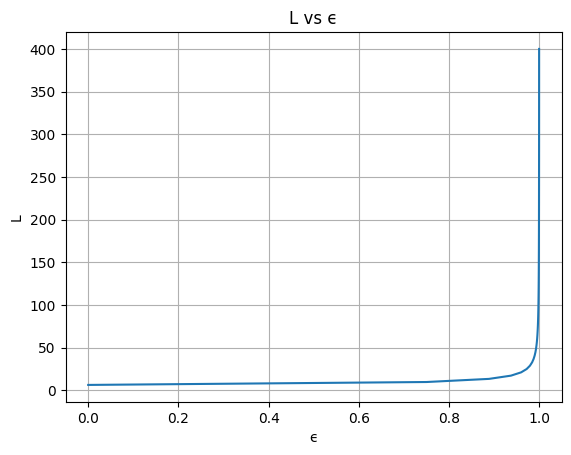

In [65]:
#procedemos ahora a graficar L vs. e

plt.plot(e,L)
plt.title('L vs ϵ')
plt.xlabel('ϵ')
plt.ylabel('L')
plt.grid();

2. Determine la longitud de arco de la solucion del problema 1.

In [76]:
#para realizar este cálculo comenzamos tomando los valore de a y de b

x = sol[:,0]

p,q = min(x), max(x)
p,q

(-0.9890907180257259, 0.5)

In [85]:
a = (abs(p) + abs(q)) / 2
a

0.744545359012863

In [86]:
y = sol[:,2]

r,s = min(y), max(y)
r,s

(-0.7032353565970514, 0.7031560732740817)

In [87]:
b = (abs(r) + abs(s)) / 2
b

0.7031957149355665

In [88]:
e = (a**2 - b**2)/(a**2)
e

0.10798920646565224

In [90]:
#por lo tanto, calculamos la integral con los datos que tenemos

phi = np.linspace(0, (np.pi / 2 ), N)
y = funcion(phi, e)
integral = integrate.trapezoid(y, phi)

L = 4 * a * integral

In [91]:
print(f'el valor de la longitud de arco es {L}')

el valor de la longitud de arco es 4.549140330638741



### Matrices: Rotación  en el plano, autovalores y autovectores
3 (33%).   Considere la siguiente matrix de rotación:
\begin{bmatrix} 
\cos \theta & -\sin \theta\\ 
\sin \theta & \cos \theta
\end{bmatrix}

a) Encontrar el polinomio característico de A

b) Encontrar los autovalores y autovectores

c) construya la matriz diagonal con los autovalores y autovectores y compruebe su solución. 

Encontrar los autovalores y autovectores para $\theta=45$.

In [52]:
#comenzamos por escribir la matriz

theta = np.pi / 4

A = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

In [57]:
#calculamos el polinomio característico

poly = np.poly(A)
print(f'el polinomio carcaterístico de la  matriz es {poly[0]:.2f}x² + {poly[1]:.2f}x + {poly[2]:.2f}')

el polinomio carcaterístico de la  matriz es 1.00x² + -1.41x + 1.00


In [61]:
#encontramos los autovalores y autovectores

val_p, vec_p = np.linalg.eig(A)

val_p, vec_p 

(array([0.70710678+0.70710678j, 0.70710678-0.70710678j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j]]))

In [62]:
#procedemos ahora con la diagonalización

P = vec_p
P_inv = np.linalg.inv(P)

D = P_inv @ A @ P
D


#observamos que en efecto los elementos que quedan en la diagonal son los autovalores de la matriz

array([[0.70710678+0.70710678j, 0.        +0.j        ],
       [0.        +0.j        , 0.70710678-0.70710678j]])

para comprobar que el resultado es correcto, verificamos si se cumple que $A \approx  P D P^{-1}$

In [70]:
verif = P @ D @ P_inv 
verif

array([[ 0.70710678+2.29934717e-17j, -0.70710678+0.00000000e+00j],
       [ 0.70710678+0.00000000e+00j,  0.70710678+2.29934717e-17j]])

In [69]:
A

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [71]:
A == verif

array([[False,  True],
       [ True, False]])

observamos que los elementos de la antidiagonal son iguales, y que los elementos de la diagonal se aproximan, pues su parte imaginaria es de un orden de magnitud tan pequeño, que puede asumirse como cero (su parte real es igual)

el mismo procedimiento anterior puede realizarse para diferentes valores de ángulo, y se obtendrá el mismo resultado